In [111]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")

In [112]:
df = pd.read_csv(
    "https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv",
    index_col="Unnamed: 0",
    low_memory=False,
)

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
df.shape

(466285, 74)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01


## Exploratory Data Analysis (EDA)

-   Fill Missing Values
-   Remove Outliers
-   Univariate Analysis
-   Bivariate Analysis


### Handling Missing Values

-   Using random sampling to fill the missing values
-   Remove columns that have missing values percentage > 16%
-   Remove categorical columns that have unique values > 35 (too many unique values can cause noise & reduce model performance)


In [116]:
def show_missing_percentage(df: pd.DataFrame):
    has_missing = df.isnull().any().sum() > 0

    if not has_missing:
        print("No missing values found in the DataFrame.")
        return None

    missing_cols = df.columns[df.isnull().any()]
    n = len(df)

    missing_percentage = (
        (df[missing_cols].isna().sum() / n * 100).round(2).sort_values()
    )

    missing_df = pd.DataFrame(
        {"Column": missing_percentage.index, "Percentage": missing_percentage.values}
    )

    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(data=missing_df, x="Percentage", y="Column", ax=ax, palette="Set3")
    ax.set_ylabel(None)
    ax.set_title("Missing Values Percentage")

    return missing_percentage

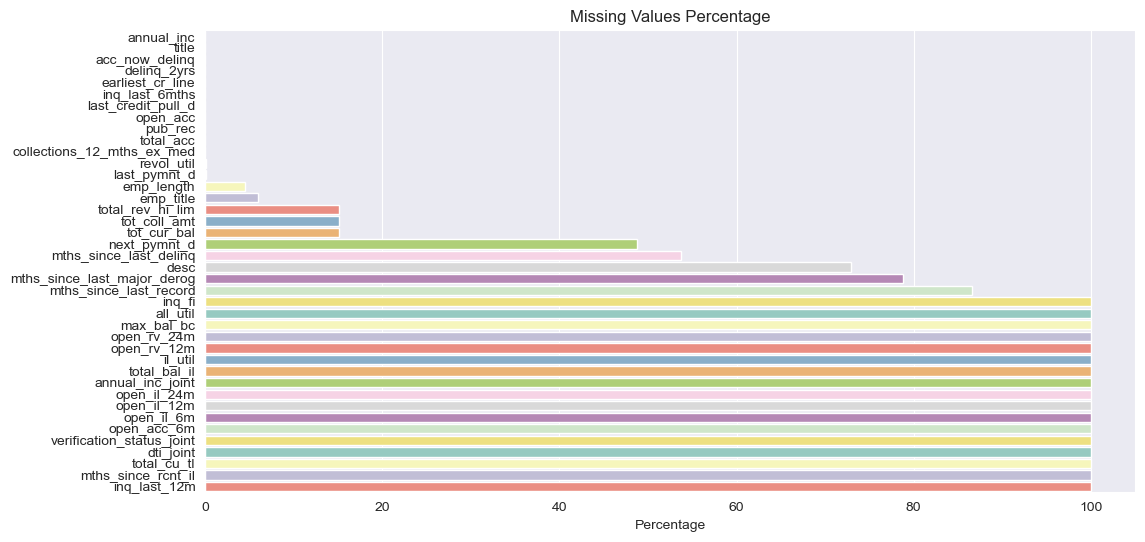

In [117]:
missing_percentage = show_missing_percentage(df)

In [118]:
missing_percentage

annual_inc                       0.00
title                            0.00
acc_now_delinq                   0.01
delinq_2yrs                      0.01
earliest_cr_line                 0.01
inq_last_6mths                   0.01
last_credit_pull_d               0.01
open_acc                         0.01
pub_rec                          0.01
total_acc                        0.01
collections_12_mths_ex_med       0.03
revol_util                       0.07
last_pymnt_d                     0.08
emp_length                       4.51
emp_title                        5.92
total_rev_hi_lim                15.07
tot_coll_amt                    15.07
tot_cur_bal                     15.07
next_pymnt_d                    48.73
mths_since_last_delinq          53.69
desc                            72.98
mths_since_last_major_derog     78.77
mths_since_last_record          86.57
inq_fi                         100.00
all_util                       100.00
max_bal_bc                     100.00
open_rv_24m 

In [119]:
# Kolom dengan jumlah missing values > 16% akan dibuang
drop_col = missing_percentage.index[missing_percentage > 16.0]
drop_col

Index(['next_pymnt_d', 'mths_since_last_delinq', 'desc',
       'mths_since_last_major_derog', 'mths_since_last_record', 'inq_fi',
       'all_util', 'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 'il_util',
       'total_bal_il', 'annual_inc_joint', 'open_il_24m', 'open_il_12m',
       'open_il_6m', 'open_acc_6m', 'verification_status_joint', 'dti_joint',
       'total_cu_tl', 'mths_since_rcnt_il', 'inq_last_12m'],
      dtype='object')

In [120]:
df = df.drop(drop_col, axis=1)

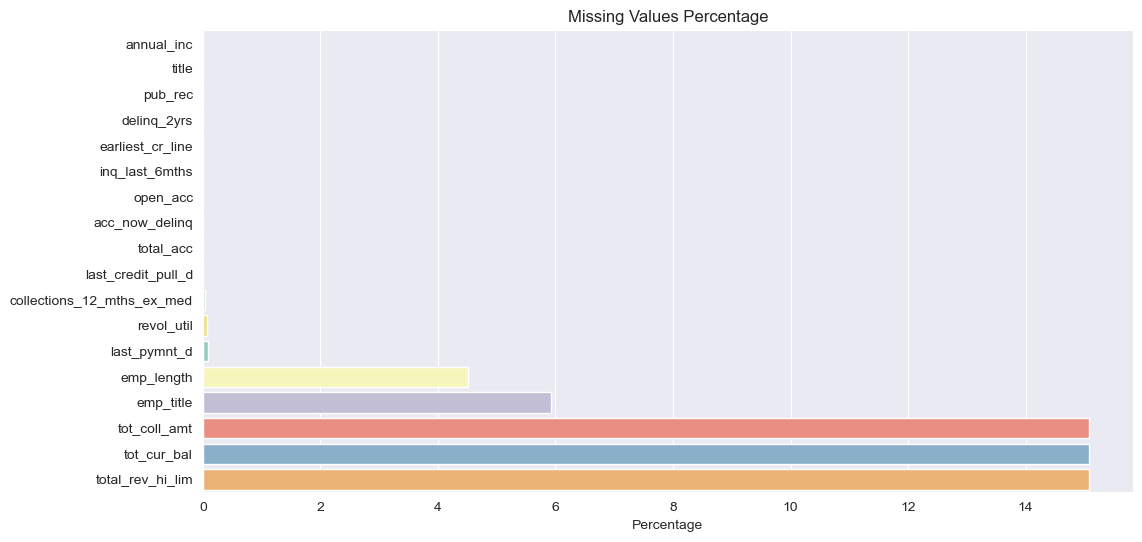

In [121]:
missing_percentage = show_missing_percentage(df)

In [122]:
def fill_nan_random_sample(df: pd.DataFrame, column: str):
    non_missing_values = df[column].dropna()
    random_samples = non_missing_values.sample(
        df[column].isna().sum(), replace=True, random_state=42
    )

    df.loc[df[column].isna(), column] = random_samples.values

    return df

In [123]:
# Imputasi missing value dengan random sampling
for col in missing_percentage.index:
    fill_nan_random_sample(df, col)

In [124]:
show_missing_percentage(df)

No missing values found in the DataFrame.


In [125]:
# Membuang kolom kategori yang nilai unique > 20 (noise)
for col in df.select_dtypes("object").columns:
    if len(df[col].value_counts()) > 35:
        print("Remove column: ", col)
        df = df.drop(col, axis=1)

Remove column:  emp_title
Remove column:  issue_d
Remove column:  url
Remove column:  title
Remove column:  zip_code
Remove column:  addr_state
Remove column:  earliest_cr_line
Remove column:  last_pymnt_d
Remove column:  last_credit_pull_d


### Univariate Analysis

-   Plotting numerical columns value distributions
-   Plotting categorical columns value distributions


In [126]:
def numerical_distribution(df: pd.DataFrame, type="box"):
    num_cols = df.select_dtypes("number").columns
    rows, cols = int(np.ceil(len(num_cols) / 4)), 4

    plt.figure(figsize=(24, 24))
    for i, col in enumerate(num_cols):
        ax = plt.subplot(rows, cols, i + 1)
        if type == "box":
            sns.boxplot(data=df, x=col, ax=ax)
        else:
            sns.kdeplot(data=df, x=col, fill=True, ax=ax)

        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(12)

        ax.set_xlabel(col, fontsize=24)

    plt.tight_layout()
    plt.show()

In [151]:
def categorical_distribution(df: pd.DataFrame):
    cat_cols = df.select_dtypes(["object", "category"]).columns

    for i, col in enumerate(cat_cols):
        plt.figure(figsize=(12, 6))
        counts = df[col].value_counts()
        long_label = (
            len(sorted(counts.index.tolist(), key=lambda x: len(x), reverse=True)[0])
            > 10
        )
        sns.barplot(x=counts.index, y=counts.values, palette="Set2")

        if long_label:
            plt.xticks([i for i in range(len(counts.index))], counts.index, rotation=90)

        plt.xlabel(col, fontsize=12)

    plt.show()

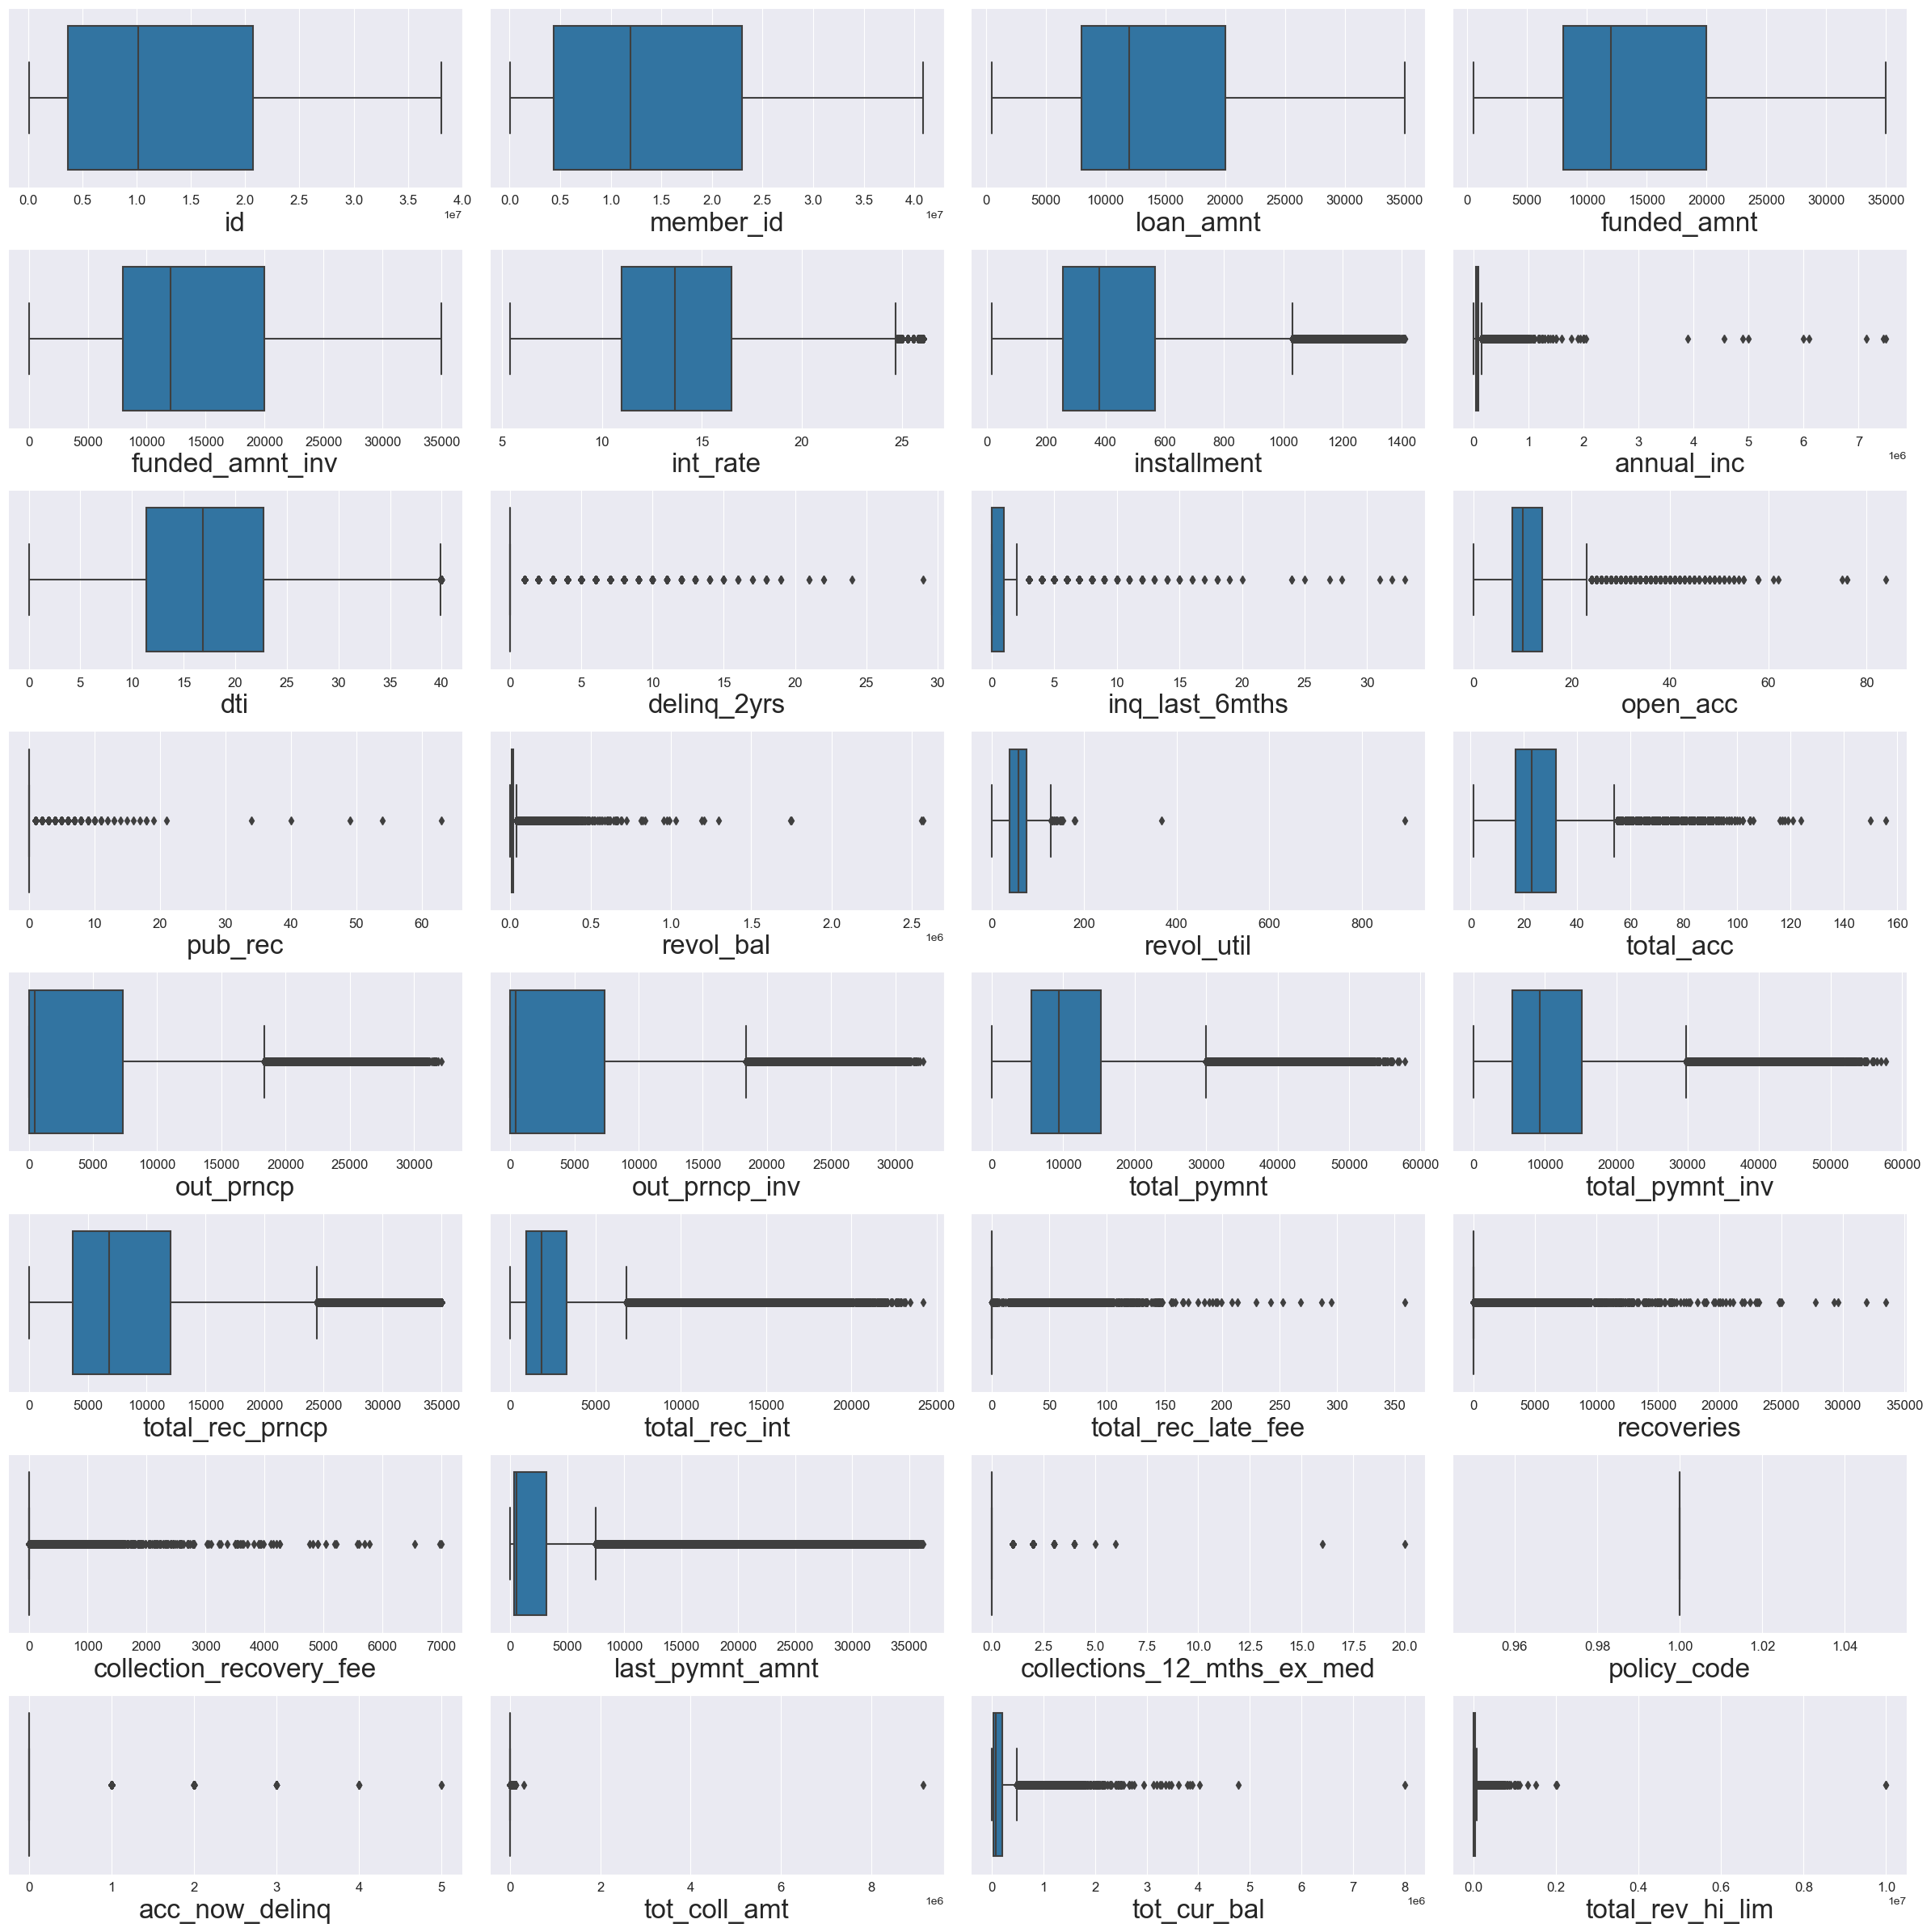

In [128]:
numerical_distribution(df)

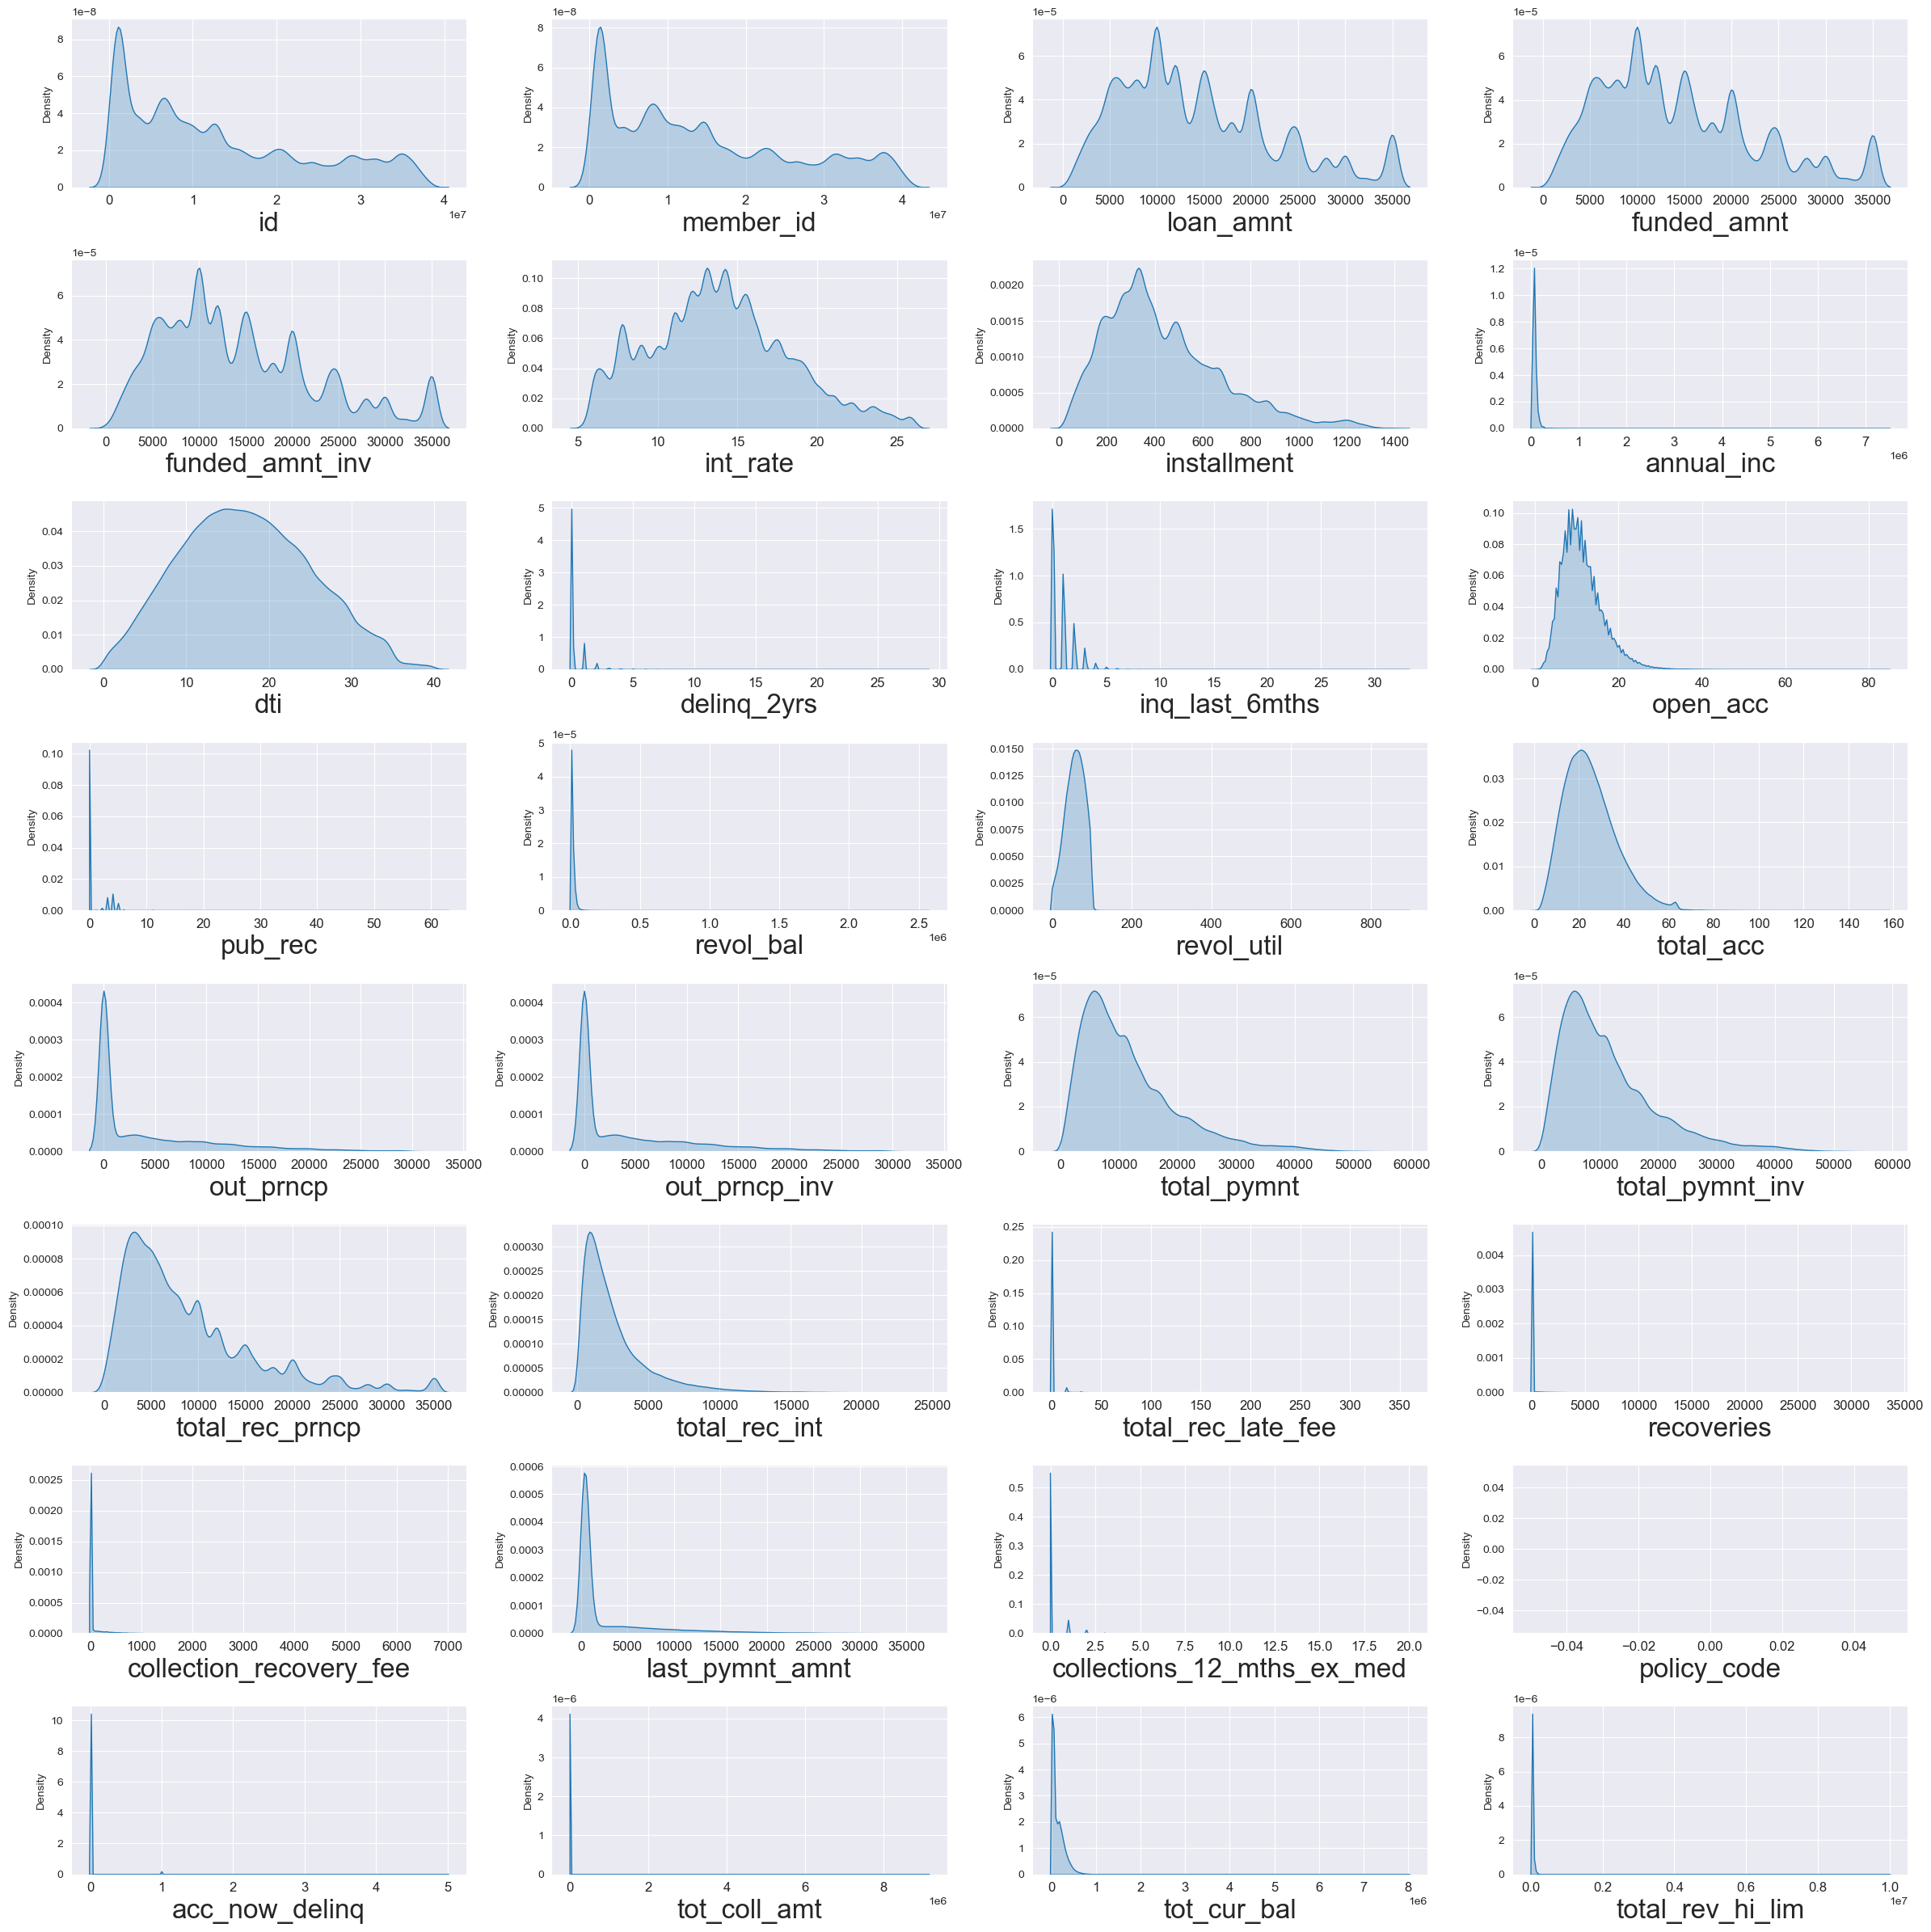

In [74]:
numerical_distribution(df, "kde")

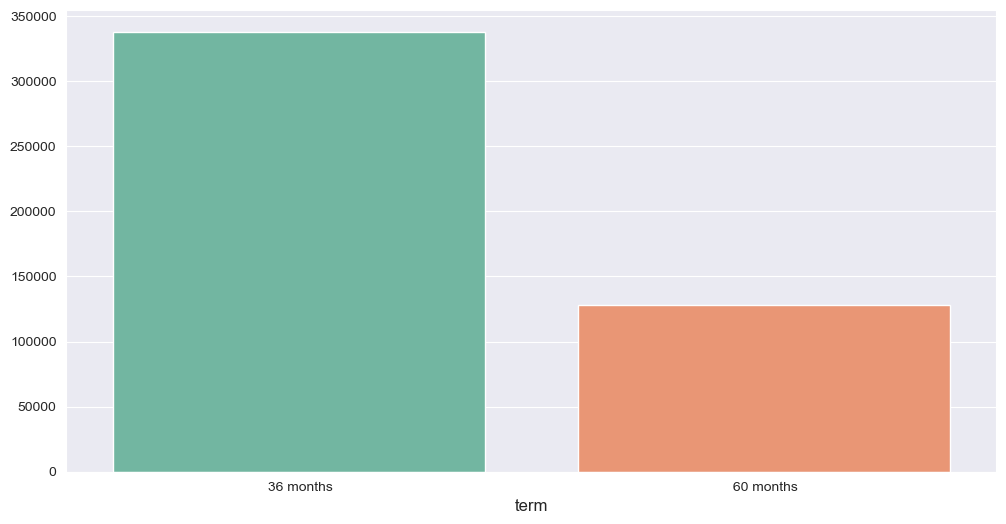

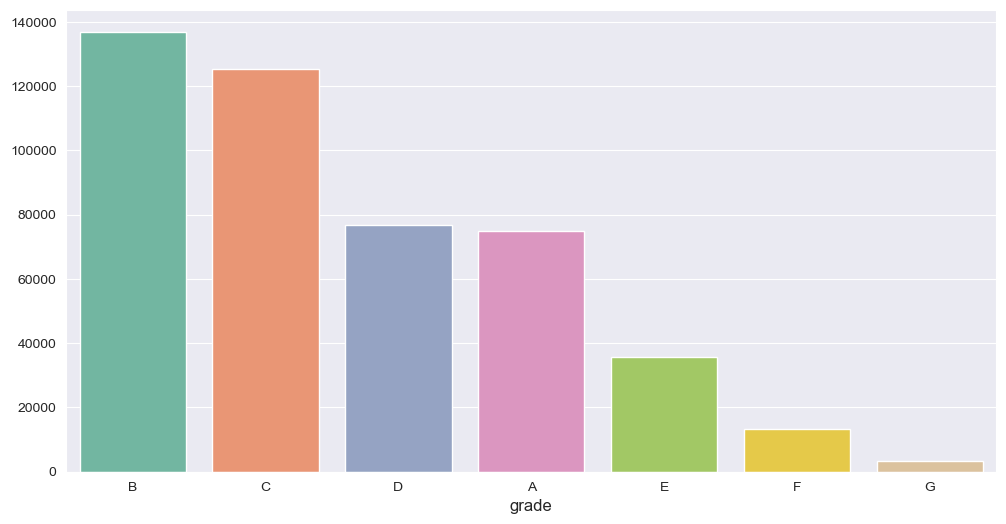

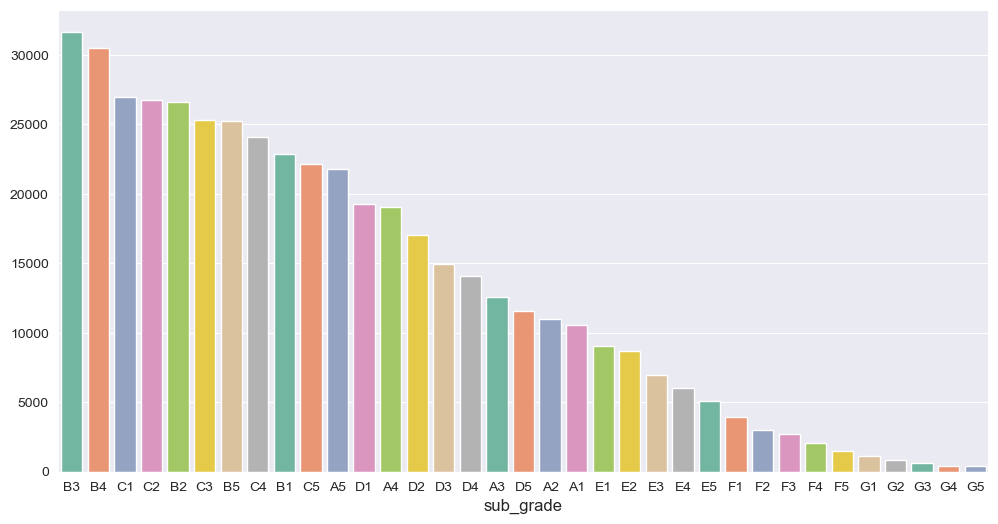

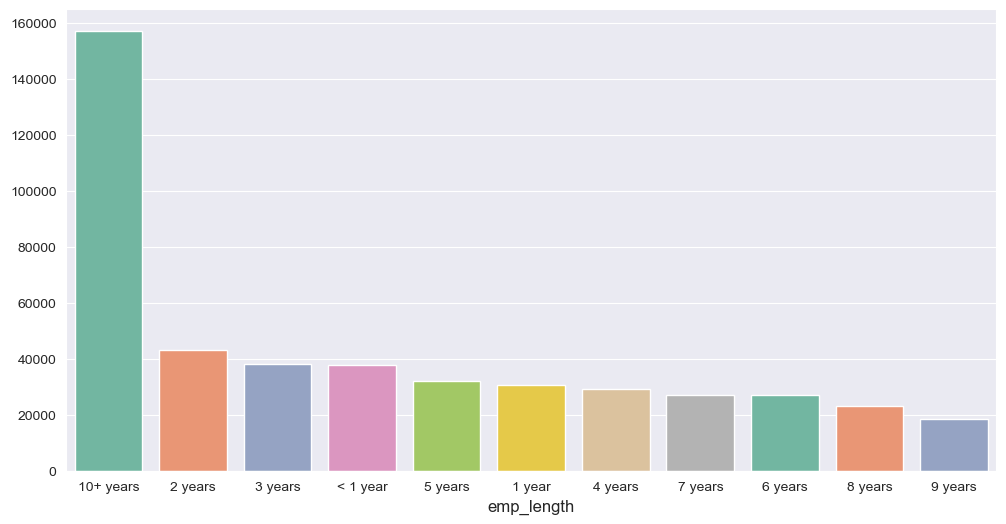

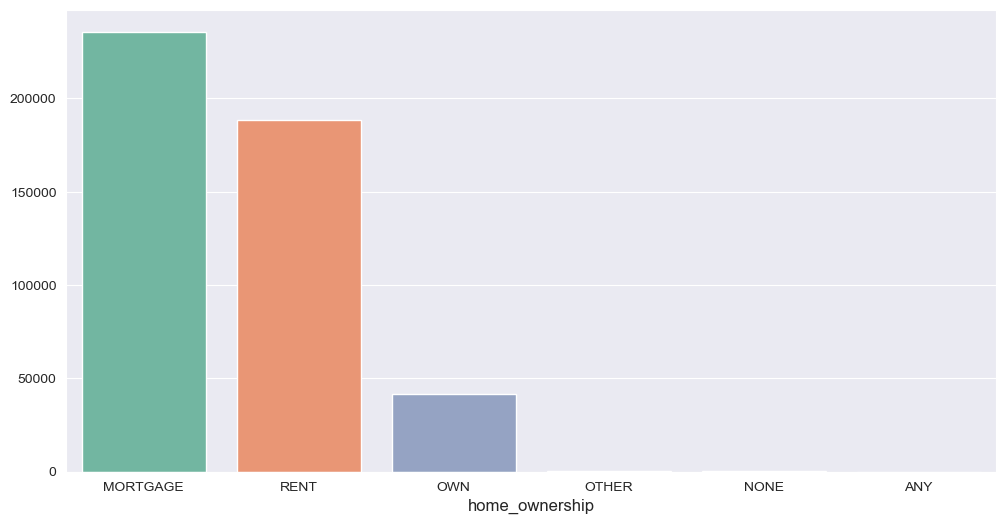

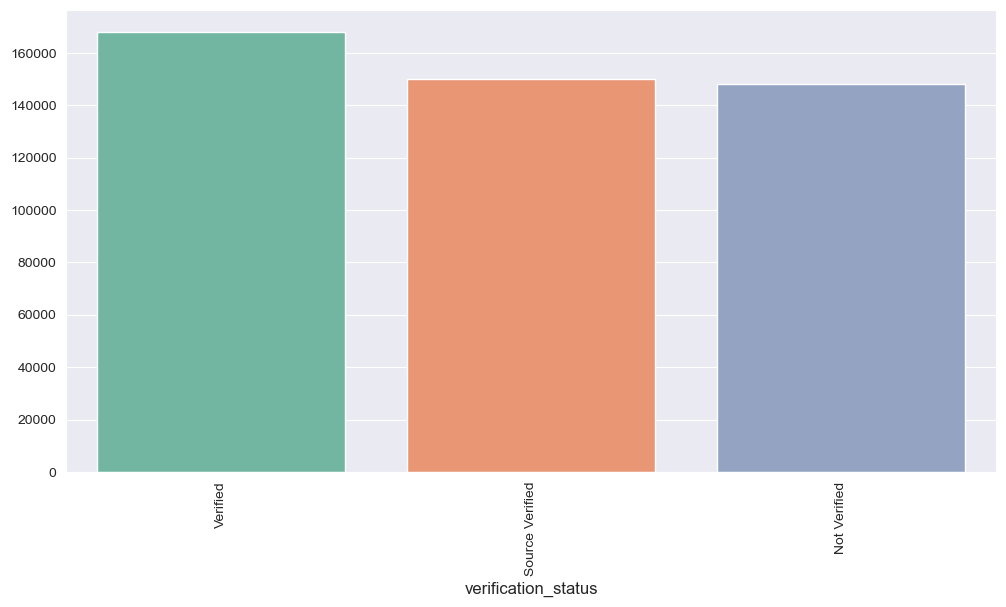

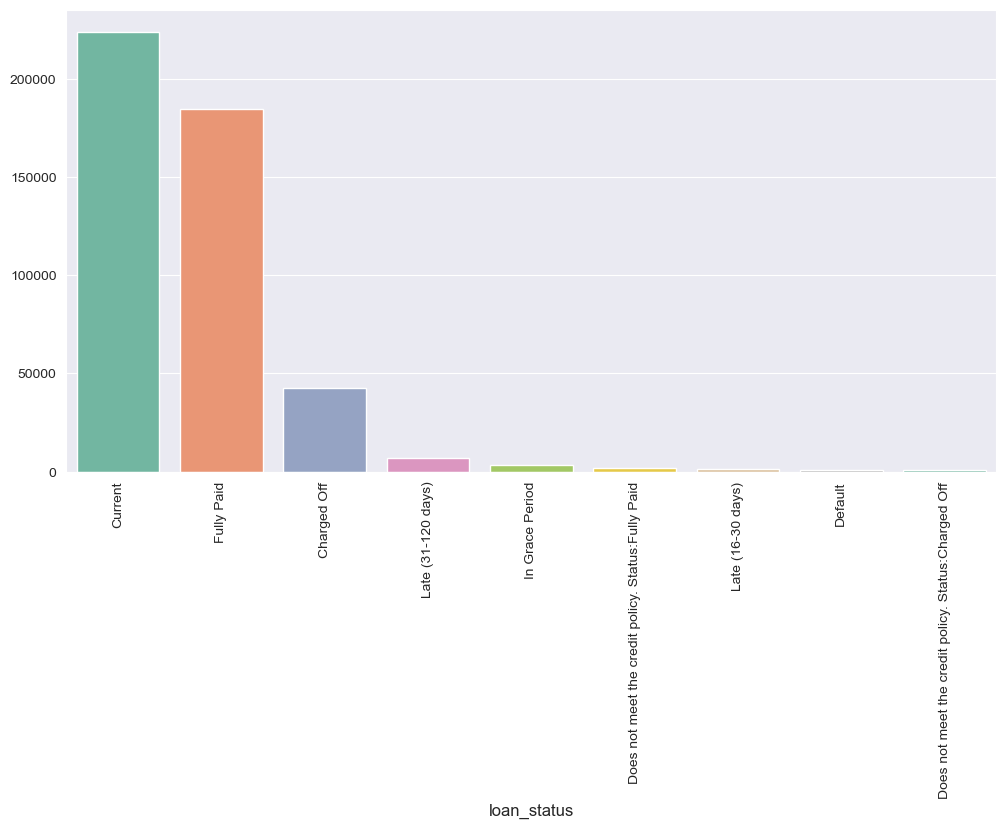

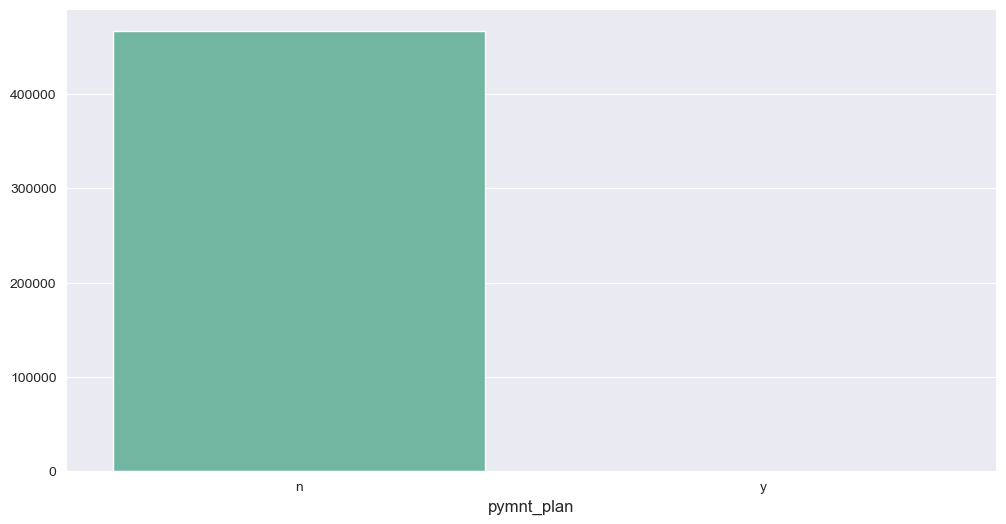

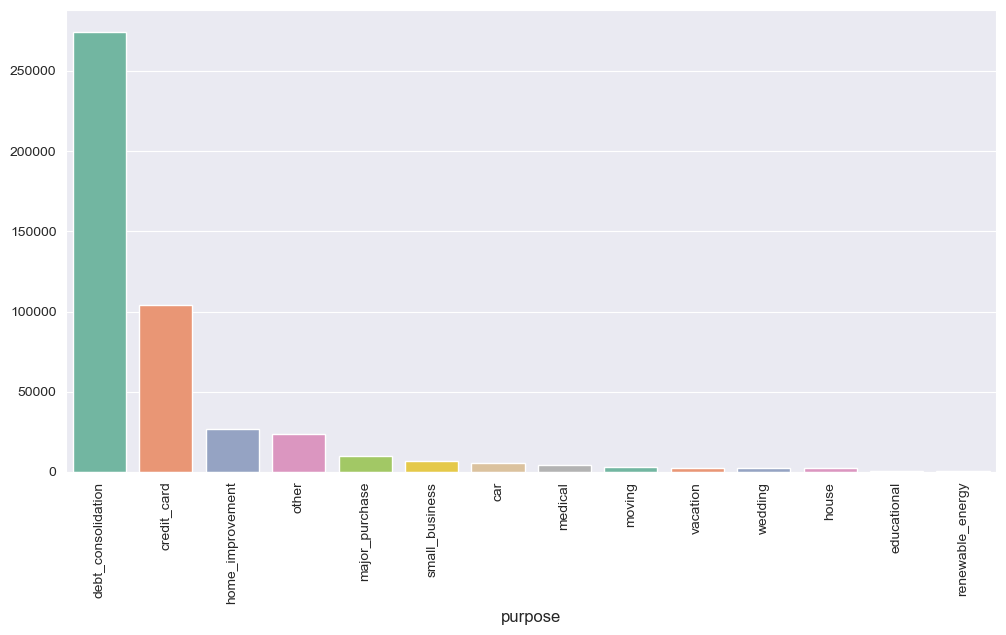

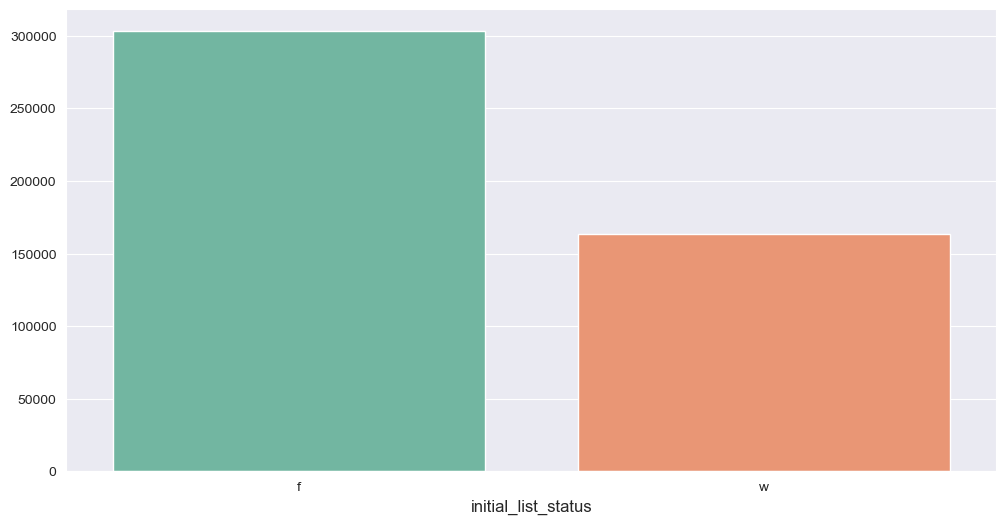

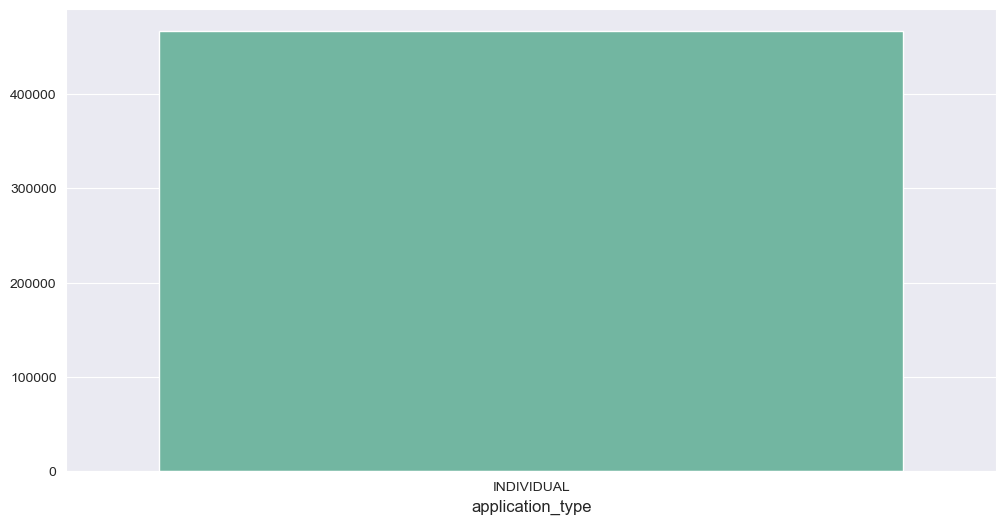

In [152]:
categorical_distribution(df)

In [153]:
for col in ["home_ownership", "loan_status", "purpose", "pymnt_plan"]:
    print(df[col].value_counts(), "\n\n")

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64 


Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64 


debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                 

In [77]:
df = df[~df["home_ownership"].isin(["OTHER", "NONE", "ANY"])]
df.loc[:, "acc_now_delinq"] = df["acc_now_delinq"].astype(int).astype(str)
df = df.drop(["policy_code", "application_type", "pymnt_plan"], axis=1)

In [78]:
# Remove outlier dengan metode IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print(f"Before removing outlier {df.shape}")
print(f"After removing outlier {df[~((df < LB) | (df > UB)).any(axis=1)].shape}")
print(
    f"Total data removed {df.shape[0] - df[~((df < LB) | (df > UB)).any(axis=1)].shape[0]} rows"
)

Before removing outlier (466052, 39)
After removing outlier (161835, 39)
Total data removed 304217 rows


In [79]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [85]:
credit_status_col = [
    "acc_now_delinq",
    "annual_inc",
    "delinq_2yrs",
    "grade",
    "last_pymnt_amnt",
    "loan_status",
    "revol_bal",
    "tot_coll_amt",
    "tot_cur_bal",
    "total_acc",
    "total_pymnt",
    "total_rec_late_fee",
]

In [86]:
df[credit_status_col]

,acc_now_delinq,annual_inc,delinq_2yrs,grade,last_pymnt_amnt,loan_status,revol_bal,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt,total_rec_late_fee
0,0,24000.0,0.0,B,171.62,Fully Paid,13648,0.0,145755.0,9.0,5861.071414,0.00
1,0,30000.0,0.0,C,119.66,Charged Off,1687,0.0,75976.0,4.0,1008.710000,0.00
2,0,12252.0,0.0,C,649.91,Fully Paid,2956,0.0,186359.0,10.0,3003.653644,0.00
3,0,49200.0,0.0,C,357.48,Fully Paid,5598,0.0,29251.0,37.0,12226.302210,16.97
4,0,80000.0,0.0,B,67.79,Current,27783,0.0,308468.0,38.0,3242.170000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,110000.0,0.0,C,432.64,Current,23208,0.0,294998.0,36.0,10383.360000,0.00
466281,0,78000.0,0.0,D,17.50,Charged Off,18238,0.0,221830.0,30.0,4677.920000,0.00
466282,0,46000.0,0.0,D,514.34,Current,6688,0.0,73598.0,43.0,12343.980000,0.00
466283,0,83000.0,3.0,A,1500.68,Fully Paid,11404,0.0,591610.0,27.0,2126.579838,0.00
